In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sys import path

from sys import path
path.insert(0, "lib")
from colorline import colorline

In [15]:
class SGD_batch:
    """
    Exact SGD dynamics 
    """
    def __init__(self, lr, q, grad_q, w_init, nsamp, batch_size, seed):
        """
        lr: learning rate
        q: model
        grad_q: gradient of the model
        """
        self.lr = lr
        self.q = q
        self.grad_q = grad_q
        self.nb = batch_size
        self.w = [w_init]
        self.state = np.random.RandomState(seed=seed)
        # uncorrelated X and Y data
        self.x, self.y = self.state.normal(size=(2, nsamp))
        
    def update(self, w_old, d1, d2,c):
        xb = self.state.choice(self.x, self.nb, replace=False)
        yb = self.state.choice(self.y, self.nb, replace=False)
        
        xi_xx = np.mean(xb*xb)
        xi_xy = np.mean(xb*yb)
        return w_old - self.lr*(xi_xx * self.q(w_old, d1, d2,c) - xi_xy) * self.grad_q(w_old, d1, d2, c)
    
    def evolve(self, nstep, d1, d2,c):
        wc = self.w[-1]
        for _ in range(nstep):
            wc = self.update(wc, d1, d2,c)
            self.w.append(wc)

def q(w,d1,d2,c):
    w1, w2 = w
    return (w1 - c)**d1*(w1**d2 + w2**d2)
    
def grad_q(w, d1, d2, c):
    w1, w2 = w
    partial_w1 = d2 * w1**(-1 + d2) * (w1 - c)**d1 + d1 * (w1 - c)**(-1 + d1) * (w1**d2 + w2**d2)
    partial_w2 = d2 * (w1 - c)**d1 * w2**(-1 + d2)
    return np.array([partial_w1, partial_w2])

In [4]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 25  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

In [19]:
# Run many trajectories of SGD

d1 = 1
d2 = 2
c = 0
lr = 0.1
batch_size = 20
nsamp = 10**4
num_trajectories = 10
niterations = 10**5
# Initialisation
wmx = 0.5
wmy = 0.5
trajectories = []
for i in range(num_trajectories):
    if i % 2 == 0:
        print(f"trajectory {i} over {num_trajectories}")
    seed = i
    wx = np.random.uniform(-wmx,wmx)
    wy = -0.4
    w_init = np.array([wx,wy])
    # maybe seed here?
    L = SGD_batch(lr, q, grad_q, w_init, nsamp, batch_size, seed)
    L.evolve(niterations, d1, d2,c)
    trajectories.append(np.array(L.w).T)

trajectories = np.asarray(trajectories)

trajectory 0 over 10


KeyboardInterrupt: 

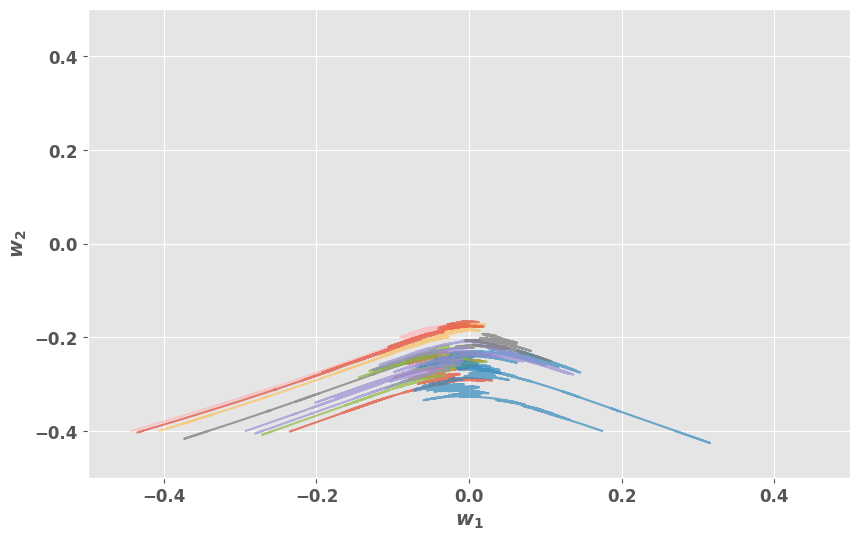

In [18]:
%matplotlib inline
fig, ax = plt.subplots()
for i in range(num_trajectories):
    w = trajectories[i,:,:]
    #x, y = np.array(L.w).T
    plt.plot(w[0,:], w[1,:], label=f'Trajectory {i+1}', alpha=0.7)
    #z = np.linspace(0, 1, len(x))
    #colorline(ax, x, y, z, cmap=plt.get_cmap('viridis'), linewidth=2)
plt.xlabel(r"$w_1$")
plt.ylabel(r"$w_2$")
plt.xlim((-wmx, wmx))
plt.ylim((-wmy, wmy))
plt.grid(True)
plt.show()

In [7]:
trajectories[:,:,0]

array([[-0.36857251, -0.4       ],
       [ 0.08782076, -0.4       ]])